<a href="https://colab.research.google.com/github/samarth-ramesh/python-projs/blob/main/perlin_pic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    import noise
except ImportError:
    !pip install noise
    import noise
try:
    from PIL import Image as im
except ImportError:
    !pip install pillow
    from PIL import Image as im
try:
    import numpy
except ImportError:
    !pip install numpy
    import numpy

import math

In [ ]:
def perlinTograyscale(OldValue ,OldMin=0, OldMax=2, NewMin=0, NewMax=255):
    return round((((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin)

In [ ]:
def genPerlin():
    for x in range(256):
        x = x/16
        for y in range(257):
            y = y/16
            yield (noise.pnoise2(x,y, octaves=3, repeaty=256, repeatx=256, persistence=0.7, lacunarity=3)) + 0.5

In [ ]:
lst = []
buf = []
for x in genPerlin():
    if len(buf) == 256:
        lst.append(buf)
        buf = []
    else:
        buf.append(x)

In [ ]:
new = []
for row in lst:
    newRow = []
    for pix in row:
        newRow.append(perlinTograyscale(OldValue=pix))
    new.append(newRow)

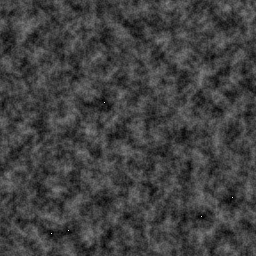

In [ ]:
a = numpy.array(new, dtype=numpy.uint8)
a
img = im.fromarray(a)
img